In [5]:
import rankedDelegation as rd
import numpy as np
from IPython.utils import io
import matplotlib.pyplot as plt
np.random.seed(42)

In this notebook, I will briefly explain how to use the rankedDelegation package. If you want to create a synthetic election, you can do it by using one of the following functions:

In [6]:
e = rd.election_popularity(n_voters=1000, p_casting=0.2, n_delegatees=4, popularity_factor=1)
#e = rd.election_friendship(n_voters=1000, p_casting=0.2, n_friends=4, friends_factor=1)
#e = rd.election_spatial(n_voters=1000, p_casting=0.2, n_delegatees=4, distrib_x="gauss", distrib_y="gauss")

If we plot the distribution of the number of delegatees per voter, we see that the distribution is centered on $4$ delegatees per voters, which is consistent with the parameter with selected

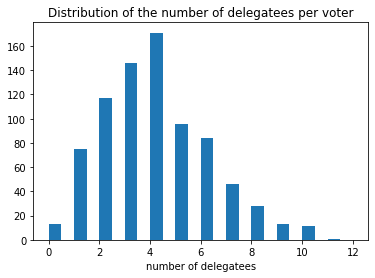

In [8]:
edges_array = []
for voter in e.list_voters:
    if voter.vote is None:
        edges_array.append(len(voter.delegatees))

plt.hist(edges_array, bins=max(edges_array), width=0.5)
plt.title("Distribution of the number of delegatees per voter")
plt.xlabel("number of delegatees")
plt.show()

Finally, we can run an election by choosing which delegation function we are using

In [10]:
def print_results(e):
    print("Winner is %i"%e.winner)
    print("Results : ",e.results)
    print("Maximum rank is %i"%e.max_rank)
    print("Maximum length is %i"%e.max_length)
    print("Average length is %.2f"%e.mean_length)
    print("Maximum guru power is %i"%e.max_power)
    print("Guru entropy is %.2f"%e.power_entropy)
    print("Maximum sum of rank is %i"%e.max_sum)
    print("Sum of rank is %i (only for confluent rules)"%e.sum_rank)
    print("Avg rank is %.2f (only for confluent rules)"%e.avg_rank)
    print("Unpopularity is %i (only for confluent rules)"%e.unpopularity)
    
e.attribute_gurus(rd.rules.breadthFirst)
#e.attribute_gurus(rd.rules.depthFirst)
#e.attribute_gurus(rd.rules.diffusion)
#e.attribute_gurus(rd.rules.lexiMax)
#e.attribute_gurus(rd.rules.maxSum)
#e.attribute_gurus(rd.rules.bordaArb)
print_results(e)

Winner is 2
Results :  [[474, 1], [511, 2]]
Maximum rank is 9
Maximum length is 4
Average length is 1.51
Maximum guru power is 27
Guru entropy is 4.88
Maximum sum of rank is 13
Sum of rank is 1563 (only for confluent rules)
Avg rank is 1.99 (only for confluent rules)
Unpopularity is 390 (only for confluent rules)
